In [2]:
import os
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
with open('raspi_garden_2019-05.log', "r") as f:
    lines = f.readlines()

In [44]:
state = "searching"
sensor_samples = []
for line in lines:
    if state == "searching":
        sensor_sample = []
        if "[INFO] JKey.LOCAL_SENSOR" in line:
            sensor_sample.append(dt.datetime.strptime(line[:19], "%Y-%m-%d %H:%M:%S"))
            state = "sensor_1"
    elif state == "sensor_1":
        sensor_sample.append(float(line[7:11]))  # T_CPU
        state = "sensor_2"
    elif state == "sensor_2":
        sensor_sample.append(float(line[7:11]))  # T_int
        sensor_sample.append(float(line[18:22])) # H_int
        state = "sensor_3"
    elif state == "sensor_3":
        sensor_sample.append(float(line[7:11]))  # T_ext
        sensor_sample.append(float(line[18:22])) # H_ext
        sensor_samples.append(sensor_sample)
        state = "searching"
        
        

In [45]:
sen = pd.DataFrame.from_records(sensor_samples, columns=["datetime", "T_CPU", "T_int", "H_int", "T_ext", "H_ext"])
sen = sen.set_index("datetime")
sen.tail()

,T_CPU,T_int,H_int,T_ext,H_ext
datetime,,,,,
2019-08-10 13:46:43,55.3,32.1,33.6,23.0,64.8
2019-08-10 14:46:56,54.8,30.9,34.6,21.7,77.7
2019-08-10 15:46:43,54.8,30.8,34.5,21.7,77.8
2019-08-10 16:46:46,53.7,30.2,35.1,21.8,78.6
2019-08-10 17:46:46,61.8,30.2,35.1,27.3,53.8


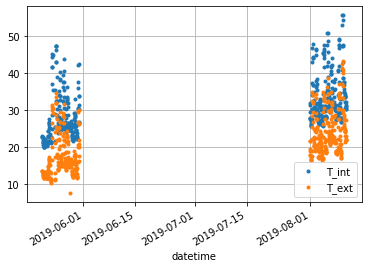

In [48]:
sen[["T_int", "T_ext"]].plot(style=".", grid="both");

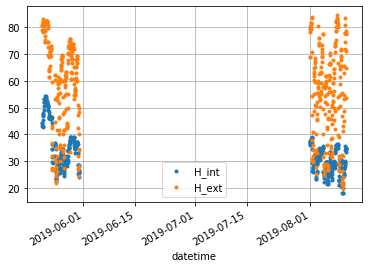

In [49]:
sen[["H_int", "H_ext"]].plot(style=".", grid="both");